Predict booking status

- Booking_ID = Pengenal unik dari tiap pemesanan
- no_of_adults = Jumlah orang dewasa
- no_of_children = Jumlah anak kecil
- no_of_weekend_nights = Jumlah malam akhir pekan (Sabtu atau Minggu) tamu menginap atau
memesan untuk menginap di hotel
- no_of_week_nights = Jumlah malam dalam seminggu (Senin hingga Jumat) tamu menginap atau
memesan untuk menginap di hotel
- type_of_meal_plan = Jenis paket makanan yang dipesan oleh pelanggan
- required_car_parking_space = Apakah pelanggan membutuhkan tempat parkir mobil? (0 - Tidak, 1-
Ya)
- room_type_reserved = Jenis kamar yang dipesan oleh pelanggan. Nilai-nilai tersebut dienkripsi oleh
INN Hotels
- lead_time = Jumlah hari antara tanggal pemesanan dan tanggal kedatangan
- arrival_year = Tahun tanggal kedatangan
- arrival_month = Bulan tanggal kedatangan
- arrival_date = Tanggal kedatangan
- market_segment_type = Penunjukan segmen pasar
- repeated_guest = Apakah pelanggan tersebut merupakan tamu yang pernah melakukan booking dan
juga menginap? (0 - Tidak, 1- Ya)
- no_of_previous_cancellations = Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan
sebelum pemesanan saat ini
- no_of_previous_bookings_not_canceled = Jumlah pemesanan sebelumnya yang tidak dibatalkan
oleh pelanggan sebelum pemesanan saat ini
- avg_price_per_room = Harga rata-rata per hari pemesanan; harga kamar bersifat dinamis. (dalam
euro)
- no_of_special_requests = Jumlah total permintaan khusus yang dibuat oleh pelanggan (misalnya
lantai yang tinggi, pemandangan dari kamar, dan lain-lain.)
- booking_status (target variable) = Flag yang menunjukkan apakah pemesanan dibatalkan atau tidak.


# EDA

In [1]:
import pandas as pd

df = pd.read_csv("data/Dataset_B_hotel.csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0.0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0.0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0.0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


Dropping `Booking_ID` column because it has no use for training.

In [2]:
df.drop(columns="Booking_ID", inplace=True)

Now checking all the numericals

In [3]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,35005.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,34643.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.031281,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.447208,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.174079,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.158417,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.275000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Based on the numbers of the means and quartiles, most the numbers are largely skewed especially in the `no_of_children` column, where even the Q3 of the numbers are 0. This generally shouldn't affect both models as they are tree based, which generally are robust to skewness and outliers, but extreme skewness may cause overfitting especially if the features are strongly correlated with the target. For classification models, skewness in the target variable may cause bias due to less samples for false negatives/positives.

Some of the zeroes might also indicate that the column should be categorical instead of numerical.

There is also some missing values on the column `required_car_parking_space` and `avg_price_per_room`. So let's handle that first.

In [4]:
df.isna().sum()

no_of_adults                               0
no_of_children                             0
no_of_weekend_nights                       0
no_of_week_nights                          0
type_of_meal_plan                        907
required_car_parking_space              1270
room_type_reserved                         0
lead_time                                  0
arrival_year                               0
arrival_month                              0
arrival_date                               0
market_segment_type                        0
repeated_guest                             0
no_of_previous_cancellations               0
no_of_previous_bookings_not_canceled       0
avg_price_per_room                      1632
no_of_special_requests                     0
booking_status                             0
dtype: int64

Turns out there is also some missing data in the column `type_of_meal_plan`, let's see what this column tells us.

In [5]:
df["type_of_meal_plan"].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', nan, 'Meal Plan 3'],
      dtype=object)

From this type of data, we can assume that `nan` values are `Not Selected`

In [6]:
df["type_of_meal_plan"] = df["type_of_meal_plan"].fillna("Not Selected")
df["type_of_meal_plan"].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

Now we continue to the column `required_car_parking_space` and `avg_price_per_room`

In [7]:
df["required_car_parking_space"].unique()

array([ 0., nan,  1.])

These values look like they belong in the categorical type, and as for the missing values, we cant assume anything because it has a yes or no value. So the last resort to this problem is to remove all the missing values.

In [8]:
df.dropna(subset="required_car_parking_space", inplace=True)

For the column `avg_price_per_room`, because it's a data that resembles the price of the room with the required booking characteristics, such as required parking or number of adults, we can't use the median of this data to fill the missing values. So the only way to handle the missing data for this column is to just drop it.

In [9]:
df.dropna(subset="avg_price_per_room", inplace=True)

In [10]:
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

No more missing values!

Now checking duplicated values

In [11]:
df.duplicated().sum()

np.int64(9031)

That's a decent amount of duplicates, we need to remove it to avoid training bias

In [12]:
df.drop_duplicates(inplace=True)

Now lets continue to plotting the numerical data to visualize the skewness better.

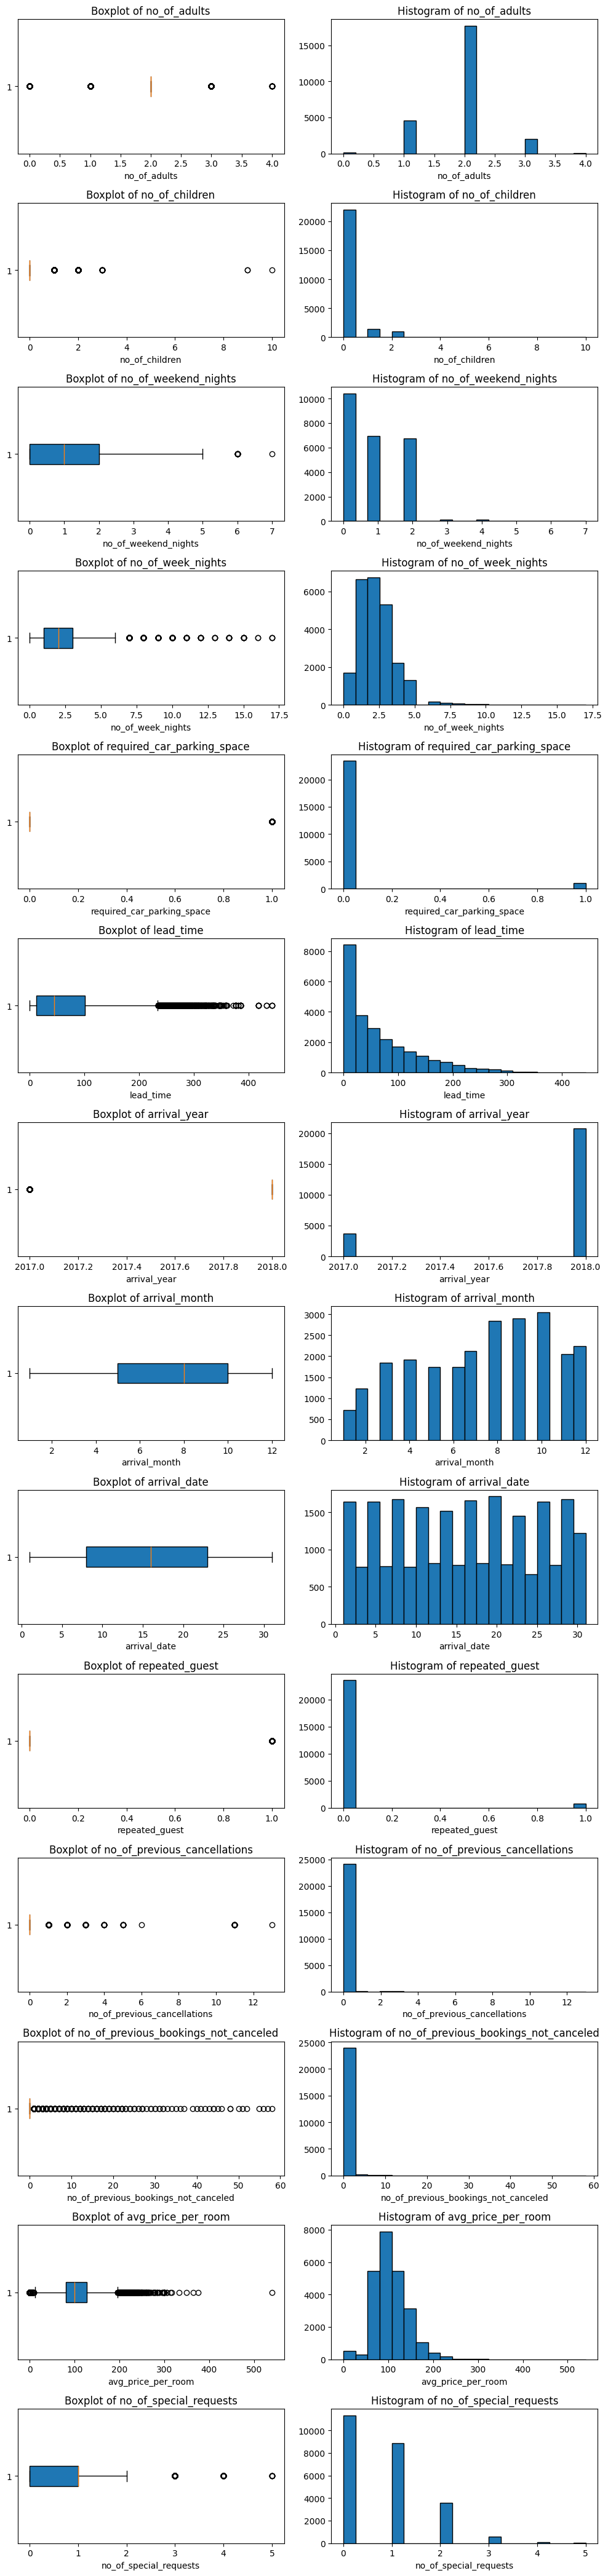

In [13]:
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include="number").columns
row_count = len(numeric_columns)

fig, axes = plt.subplots(nrows=row_count, ncols=2, figsize=(10, row_count * 3))

for idx, col in enumerate(numeric_columns):
    axes[idx][0].boxplot(df[col], vert=False, patch_artist=True)
    axes[idx][0].set_title(f"Boxplot of {col}")
    axes[idx][0].set_xlabel(col)

    axes[idx][1].hist(df[col], bins=20, edgecolor="black")
    axes[idx][1].set_title(f"Histogram of {col}")
    axes[idx][1].set_xlabel(col)

fig.tight_layout()

There seems to be a lot of outliers due to the skewness of the data, where not everyone requires the top end of the requirements to book a room. Some of the numerical should also be categorical, where that too are skewed to the value "0" which may lead to bias. But because tree-based model (Random Forest and XGBoost) are used, outliers and skewness at the feature values should not be an issue.

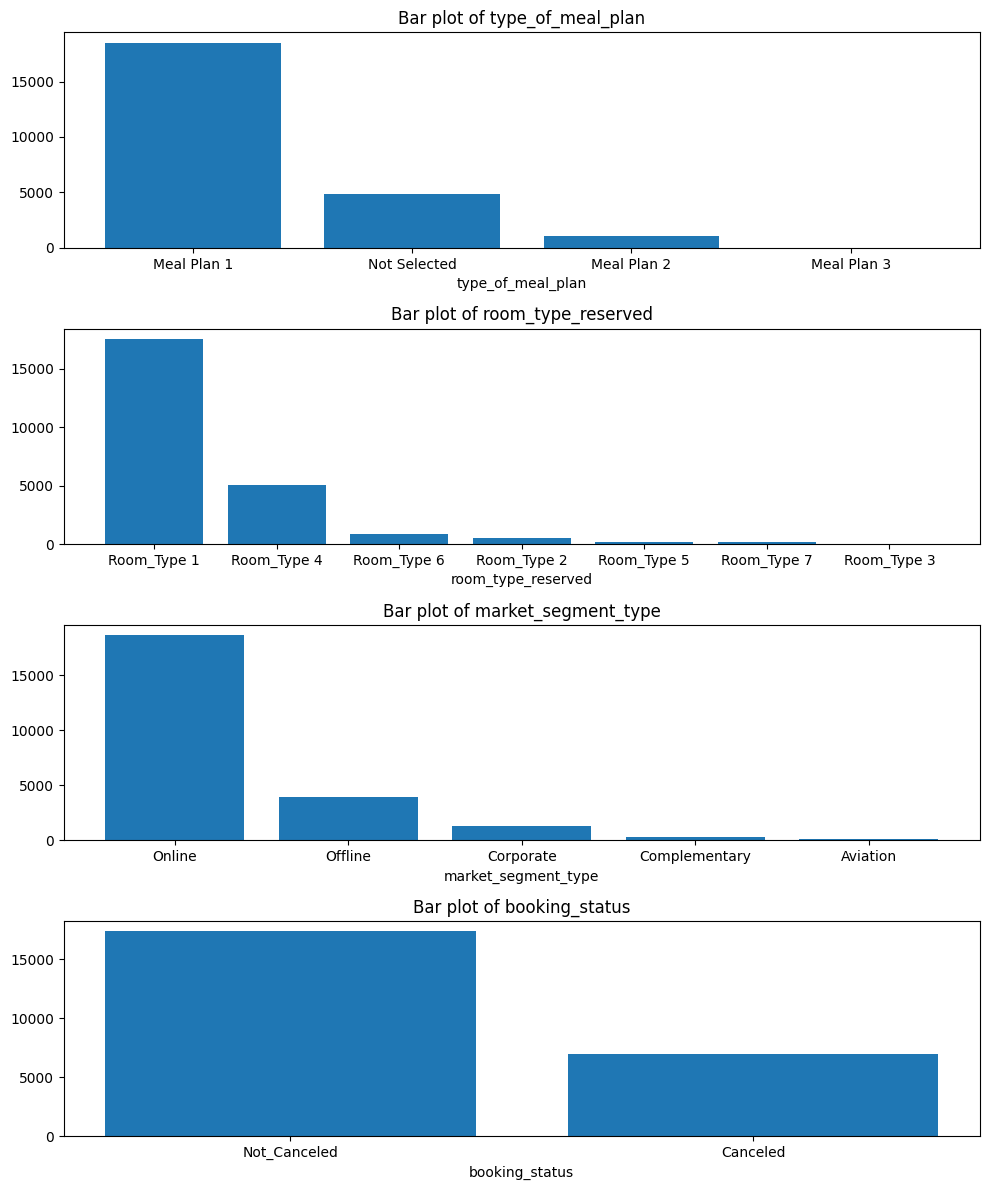

In [14]:
categorical_columns = df.select_dtypes(include="object").columns
row_count = len(categorical_columns)

fig, axes = plt.subplots(nrows=row_count, ncols=1, figsize=(10, row_count * 3))

for idx, col in enumerate(categorical_columns):
    column_counts = df[col].value_counts()

    axes[idx].bar(column_counts.index, column_counts.values)
    axes[idx].set_title(f"Bar plot of {col}")
    axes[idx].set_xlabel(col)

fig.tight_layout()

Similar to the numerical data, the categorical data is also skewed to the cheaper options, but the problem here is the target value (`booking_status`), where the value *Not_Canceled* is ~2x more than the value *Canceled*, which may lead to bias on the value *Not_Canceled* when predicting.

# Preprocessing

Because tree based models are used, scaling won't have an effect so the preprocessing will just be encoding.

I will just use `LabelEncoding` for every category, because unlike mathematical models (especially neural network), tree-based models won't introduce false ordinal relationships.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

df_x = df.drop(columns="booking_status")
df_y = df["booking_status"]

# Separate train and test data before preprocessing
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

type_of_meal_encoder = LabelEncoder()
room_type_encoder = LabelEncoder()
market_segment_type_encoder = LabelEncoder()

target_encoder = LabelEncoder()

train_x["type_of_meal_plan"] = type_of_meal_encoder.fit_transform(train_x["type_of_meal_plan"])
train_x["room_type_reserved"] = room_type_encoder.fit_transform(train_x["room_type_reserved"])
train_x["market_segment_type"] = market_segment_type_encoder.fit_transform(train_x["market_segment_type"])

train_y = target_encoder.fit_transform(train_y)

test_x["type_of_meal_plan"] = type_of_meal_encoder.transform(test_x["type_of_meal_plan"])
test_x["room_type_reserved"] = room_type_encoder.transform(test_x["room_type_reserved"])
test_x["market_segment_type"] = market_segment_type_encoder.transform(test_x["market_segment_type"])

test_y = target_encoder.transform(test_y)


# Saving the encoders
joblib.dump(type_of_meal_encoder, filename="encoders/type_of_meal_encoder.pkl")
joblib.dump(room_type_encoder, filename="encoders/room_type_encoder.pkl")
joblib.dump(market_segment_type_encoder, filename="encoders/market_segment_type_encoder.pkl")
joblib.dump(target_encoder, filename="encoders/target_encoder.pkl")

['encoders/target_encoder.pkl']

# Training

`GridSearchCV` will be used to find the best parameters for both models.

## Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

random_forest_model = RandomForestClassifier()
random_forest_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2'],
    "bootstrap": [True, False], 
    "class_weight": [None, 'balanced'],
}

random_forest_grid = GridSearchCV(
    random_forest_model,
    random_forest_params,
    cv=3,
    scoring="f1_macro",
    verbose=3,
    n_jobs=-1
)

random_forest_grid.fit(train_x, train_y)
random_forest_grid.best_params_

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


{'bootstrap': True,
 'class_weight': 'balanced',
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [17]:
best_random_forest_model = random_forest_grid.best_estimator_

## XGBoost Model

In [18]:
from xgboost import XGBClassifier

xgboost_model = XGBClassifier()
xgboost_params = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],    
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 1, 5],
    "reg_alpha": [0, 0.1, 1],
    "reg_lambda": [1, 5, 10],
    "scale_pos_weight": [1, 2, 5],
}

xgboost_grid = GridSearchCV(
    xgboost_model,
    xgboost_params,
    cv=3,
    scoring="f1_macro",
    verbose=3,
    n_jobs=-1
)

xgboost_grid.fit(train_x, train_y)
xgboost_grid.best_params_

Fitting 3 folds for each of 8748 candidates, totalling 26244 fits


{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'n_estimators': 200,
 'reg_alpha': 0.1,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1.0}

In [19]:
best_xgboost_model = xgboost_grid.best_estimator_

# Model Evaluation

## Random Forest Model

In [20]:
random_forest_pred = best_random_forest_model.predict(test_x)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

test_y_inversed = target_encoder.inverse_transform(test_y)
random_forest_pred_inversed = target_encoder.inverse_transform(random_forest_pred)

print(classification_report(test_y_inversed, random_forest_pred_inversed))

              precision    recall  f1-score   support

    Canceled       0.75      0.74      0.75      1369
Not_Canceled       0.90      0.91      0.90      3512

    accuracy                           0.86      4881
   macro avg       0.83      0.82      0.83      4881
weighted avg       0.86      0.86      0.86      4881



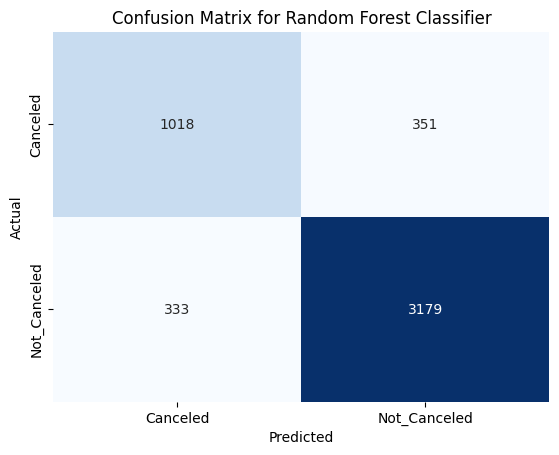

In [22]:
import seaborn as sns

confusion_matrix_result = confusion_matrix(test_y_inversed, random_forest_pred_inversed)
sns.heatmap(
    confusion_matrix_result, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    cbar=False,
    xticklabels=["Canceled", "Not_Canceled"],
    yticklabels=["Canceled", "Not_Canceled"]
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

Based on the results from the confusion matrix and the classification report, the model performs decently especially on the `Not_Canceled` classification, which is the bias that we have been talking about. But with 86% accuracy and similar F1 scores, that is the best we can do with this kind of data.

In [23]:
xgboost_pred = best_xgboost_model.predict(test_x)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

test_y_inversed = target_encoder.inverse_transform(test_y)
xgboost_pred_inversed = target_encoder.inverse_transform(xgboost_pred)

print(classification_report(test_y_inversed, xgboost_pred_inversed))

              precision    recall  f1-score   support

    Canceled       0.79      0.71      0.75      1369
Not_Canceled       0.89      0.93      0.91      3512

    accuracy                           0.87      4881
   macro avg       0.84      0.82      0.83      4881
weighted avg       0.86      0.87      0.86      4881



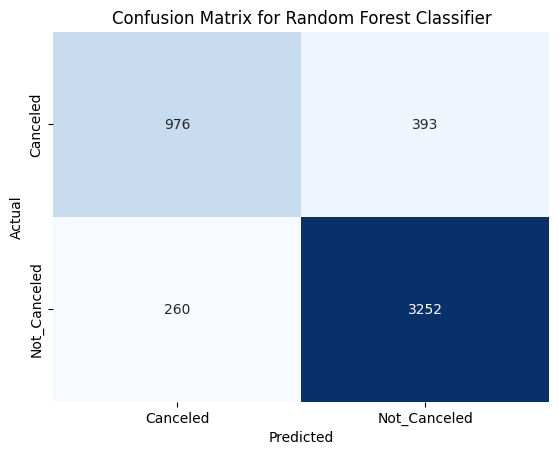

In [25]:
import seaborn as sns

confusion_matrix_result = confusion_matrix(test_y_inversed, xgboost_pred_inversed)
sns.heatmap(
    confusion_matrix_result, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    cbar=False,
    xticklabels=["Canceled", "Not_Canceled"],
    yticklabels=["Canceled", "Not_Canceled"]
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

XGBoost performs a bit better than the Random Forest model. And based on the confusion matrix, i can certainly tell that it has a bit more bias towards the `Not_Canceled` class. Though because of that, the accuracy also improved slightly.

# Saving best model

In [27]:
joblib.dump(xgboost_model, "models/model.pkl")

['models/model.pkl']